In [ ]:
import cv2
import os
import pickle
import random
import numpy as np
from sklearn import svm
from scipy import ndimage
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from sklearn.decomposition import PCA
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Set the path to the dataset
dataset_path = "/content/drive/MyDrive/Data/Writers/"

# Define the path to the folder where preprocessed images will be saved
preprocessed_path = '/content/drive/MyDrive/Data/Preprocessed_mages/'

# Define the preprocessing techniques to apply
preprocessing_techniques = ['grayscale', 'imbalanced_data']

# Define the augmentation techniques to apply
augmentation_techniques = ['rotate' , 'gaussian_blur', 'flip', 'zoom', 'brightness_adjust', 'resize']

# Define augmentation parameters
angles = [-10, -5, 5, 10]  # Rotation angles in degrees
scales = [0.8, 1.1, 1.3]  # Scaling factors
brightness_values = [-25, 25]  # Brightness adjustment values
flips = [0, 1, -1]  # Flip codes (0 = no flip, 1 = horizontal flip, -1 = vertical flip)
kernel_sizes = [3, 5, 7]  # Gaussian blur kernel sizes

# Define the sizes to which the images will be resized
image_sizes = [(256, 256)]


Class: Mubashir | Number of images: 20
Class: Ali Hassan | Number of images: 20
Class: Sarmad | Number of images: 20
Class: Abdullah_Jan | Number of images: 20
Class: Mudassar | Number of images: 20
Class: Ahmad | Number of images: 20
Class: Talha | Number of images: 20
Class: Hamza | Number of images: 20
Class: Rana_Saad | Number of images: 20
Class: Ehsaan | Number of images: 20
Class: Ayesha_Umar | Number of images: 20
Class: Adil Jabbar | Number of images: 22
Class: Ayesha Asif | Number of images: 9
Class: Sumayyah Sayyad | Number of images: 25
Class: Maria Asghar | Number of images: 25


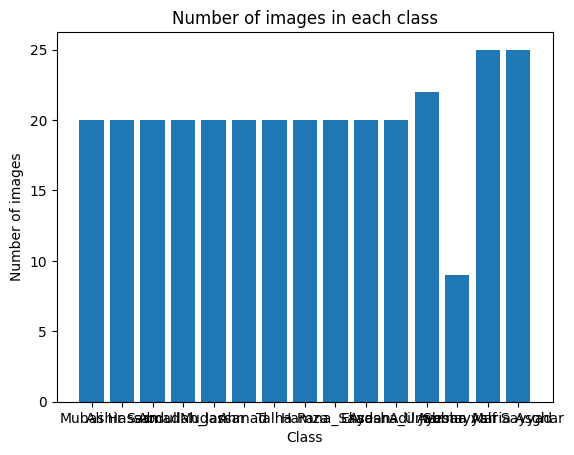

The number of classes is:  15
The total number of images is:  301


In [ ]:
import os
import matplotlib.pyplot as plt

# Set the path to the dataset
dataset_path = "/content/drive/MyDrive/Data/Writers/"

# Get a list of all the classes in the dataset
classes = os.listdir(dataset_path)

# Initialize an empty dictionary to store the number of images in each class
class_counts = {}

# Loop through each class and count the number of images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    class_images = os.listdir(class_path)
    class_counts[class_name] = len(class_images)
    print("Class:", class_name, "| Number of images:", len(class_images))

# Calculate the average number of images per class
avg_images = sum(class_counts.values()) / len(class_counts)

# Create a bar chart to visualize the number of images in each class
plt.bar(range(len(class_counts)), list(class_counts.values()), align='center')
plt.xticks(range(len(class_counts)), list(class_counts.keys()))
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images in each class')
plt.show()

# Print the average number of images per class, the number of classes, and the total number of images
total_images = sum(class_counts.values())
# print("The average number of images per class is: ", avg_images)
print("The number of classes is: ", len(classes))
print("The total number of images is: ", total_images)


In [ ]:
# Create the folder if it does not exist
if not os.path.exists(preprocessed_path):
    os.makedirs(preprocessed_path)

# Load the dataset and calculate class distribution
labels = []
for writer_folder in os.listdir(dataset_path):
    writer_folder_path = os.path.join(dataset_path, writer_folder)
    for image_path in os.listdir(writer_folder_path):
        labels.append(writer_folder)
class_distribution = np.unique(labels, return_counts=True)

# Apply preprocessing techniques
preprocessed_data = []
for writer_folder in os.listdir(dataset_path):
    writer_folder_path = os.path.join(dataset_path, writer_folder)
    for image_path in os.listdir(writer_folder_path):
        image_full_path = os.path.join(writer_folder_path, image_path)
        image = cv2.imread(image_full_path)

        # Apply preprocessing techniques
        for technique in preprocessing_techniques:
            if technique == 'grayscale':
                image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            elif technique == 'imbalanced_data' and (class_distribution[1].std() / class_distribution[1].mean()) > 0.5:
                # Apply imbalanced data technique only if there is a significant class imbalance
                ros = RandomOverSampler(random_state=42)
                reshaped_image = image.reshape(-1, image.shape[-1])
                X_resampled, y_resampled = ros.fit_resample(reshaped_image, [writer_folder] * reshaped_image.shape[0])
                image = X_resampled.reshape(image.shape[:-1])

        # Save the preprocessed image in the directory with the directory of the class name
        preprocessed_image_path = os.path.join(preprocessed_path, writer_folder, image_path)
        os.makedirs(os.path.dirname(preprocessed_image_path), exist_ok=True)
        cv2.imwrite(preprocessed_image_path, image)

        # Append the preprocessed image to the list
        preprocessed_data.append(image)


In [ ]:
# Load the preprocessed images and apply augmentation techniques
for class_name in os.listdir(preprocessed_path):
    class_path = os.path.join(preprocessed_path, class_name)
    for preprocessed_image_path in os.listdir(class_path):
        preprocessed_image_full_path = os.path.join(class_path, preprocessed_image_path)
        image = cv2.imread(preprocessed_image_full_path)

        # Apply augmentation techniques
        for angle in angles:
            rotated_image = ndimage.rotate(image, angle)
            augmented_image_path = os.path.join(class_path, f'rotated_{angle}_{preprocessed_image_path}')
            cv2.imwrite(augmented_image_path, rotated_image)

        for scale in scales:
            zoomed_image = cv2.resize(image, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)
            augmented_image_path = os.path.join(class_path, f'zoomed_{scale}_{preprocessed_image_path}')
            cv2.imwrite(augmented_image_path, zoomed_image)

        for brightness in brightness_values:
            brightness_adjusted_image = cv2.convertScaleAbs(image, beta=brightness)
            augmented_image_path = os.path.join(class_path, f'brightness_{brightness}_{preprocessed_image_path}')
            cv2.imwrite(augmented_image_path, brightness_adjusted_image)

        for flip in flips:
            flipped_image = cv2.flip(image, flip)
            augmented_image_path = os.path.join(class_path, f'flipped_{flip}_{preprocessed_image_path}')
            cv2.imwrite(augmented_image_path, flipped_image)

        # Apply Gaussian blur
        for kernel_size in kernel_sizes:
            blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
            augmented_image_path = os.path.join(class_path, f'blurred_{kernel_size}_{preprocessed_image_path}')
            cv2.imwrite(augmented_image_path, blurred_image)

        # Resize image and add to dataset
        for size in image_sizes:
            resized_image = cv2.resize(image, size)
            augmented_image_path = os.path.join(class_path, f'resized_{size[0]}x{size[1]}_{preprocessed_image_path}')
            cv2.imwrite(augmented_image_path, resized_image)


Class: Mubashir | Number of images: 340
Class: Ali Hassan | Number of images: 340
Class: Sarmad | Number of images: 340
Class: Abdullah_Jan | Number of images: 340
Class: Mudassar | Number of images: 340
Class: Ahmad | Number of images: 340
Class: Talha | Number of images: 340
Class: Hamza | Number of images: 340
Class: Rana_Saad | Number of images: 340
Class: Ehsaan | Number of images: 340
Class: Ayesha_Umar | Number of images: 340
Class: Adil Jabbar | Number of images: 374
Class: Ayesha Asif | Number of images: 153
Class: Sumayyah Sayyad | Number of images: 425
Class: Maria Asghar | Number of images: 425


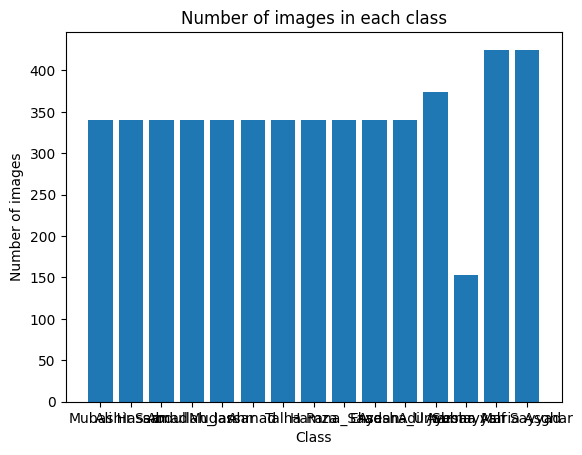

The number of classes is:  15
The total number of images is:  5117


In [ ]:
# Set the path to the dataset
dataset_path = "/content/drive/MyDrive/Data/Preprocessed_Images/"

# Get a list of all the classes in the dataset
classes = os.listdir(dataset_path)

# Initialize an empty dictionary to store the number of images in each class
class_counts = {}

# Loop through each class and count the number of images
for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    class_images = os.listdir(class_path)
    class_counts[class_name] = len(class_images)
    print("Class:", class_name, "| Number of images:", len(class_images))

# Calculate the average number of images per class
avg_images = sum(class_counts.values()) / len(class_counts)

# Create a bar chart to visualize the number of images in each class
plt.bar(range(len(class_counts)), list(class_counts.values()), align='center')
plt.xticks(range(len(class_counts)), list(class_counts.keys()))
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images in each class')
plt.show()

# Print the average number of images per class, the number of classes, and the total number of images
total_images = sum(class_counts.values())
# print("The average number of images per class is: ", avg_images)
print("The number of classes is: ", len(classes))
print("The total number of images is: ", total_images)


In [ ]:
# Load the preprocessed data
X = []
y = []
for class_name in os.listdir(preprocessed_path):
    class_path = os.path.join(preprocessed_path, class_name)
    for preprocessed_image_path in os.listdir(class_path):
        preprocessed_image_full_path = os.path.join(class_path, preprocessed_image_path)
        image = cv2.imread(preprocessed_image_full_path)
        
        # Resize the image to 100x100
        resized_image = cv2.resize(image, (100, 100))
        
        X.append(resized_image.flatten())
        y.append(class_name)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model with a specified number of epochs
svm_model = svm.SVC(kernel='linear', C=1.0, probability=True)
num_epochs = 1
for epoch in range(num_epochs):
    svm_model.fit(X_train, y_train)
    train_accuracy = svm_model.score(X_train, y_train)
    test_accuracy = svm_model.score(X_test, y_test)
    print(f"Epoch {epoch+1}: Training accuracy={train_accuracy}, Testing accuracy={test_accuracy}")

Epoch 1: Training accuracy=1.0, Testing accuracy=0.94921875


In [ ]:
# Save the trained SVM model to disk
with open('/content/drive/MyDrive/Data/svm_model.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

In [ ]:
# Set the decision threshold
decision_threshold = 0.9

# Load the saved model from disk
with open('/content/drive/MyDrive/Data/svm_model.pkl', 'rb') as f:
    svm_model = pickle.load(f)

new_image_path = '/content/drive/MyDrive/Data/Writers/Ali Hassan/image_1.png'

# Load a new test image and preprocess it
new_image = cv2.imread(new_image_path)
resized_new_image = cv2.resize(new_image, (100, 100))
flattened_new_image = resized_new_image.flatten()

# Predict the writer's name on the new test image
predicted_probabilities = svm_model.predict_proba([flattened_new_image])

if max(predicted_probabilities[0]) >= decision_threshold:
    predicted_name = svm_model.classes_[np.argmax(predicted_probabilities)]
    predicted_probability = max(predicted_probabilities[0])
    # Check if the confidence level is 90% or above
    if predicted_probability >= 0.9:
        predicted_class_indices = svm_model.predict([flattened_new_image])
        predicted_class_index = np.argmax(predicted_class_indices)
        predicted_class_name = svm_model.classes_[predicted_class_index]
        print(f"The predicted writer's name is {predicted_name} with a confidence level of {predicted_probability * 100:.2f}%")

else:
    predicted_probability = max(predicted_probabilities[0])
    print(f"The writer of the image is Unknown")
    print(f"The predicted writer's name could not be determined due to insufficient confidence level of {predicted_probability * 100:.2f}%.")
    # predicted_name = "Unknown"
